🏆 Model Selection & Final Evaluation
✅ Loaded XGBoost
✅ Loaded LightGBM
✅ Loaded CatBoost
✅ Loaded RandomForest
✅ Loaded VotingEnsemble
Validation data: (984, 93)

📊 MODEL PERFORMANCE COMPARISON
Validation Accuracy Ranking:
1. XGBoost        : 1.0000 (CV: 0.9995±0.0010)
2. LightGBM       : 1.0000 (CV: 0.9995±0.0010)
3. CatBoost       : 1.0000 (CV: 1.0000±0.0000)
4. RandomForest   : 1.0000 (CV: 0.9985±0.0019)
5. VotingEnsemble : 1.0000 (CV: 1.0000±0.0000)


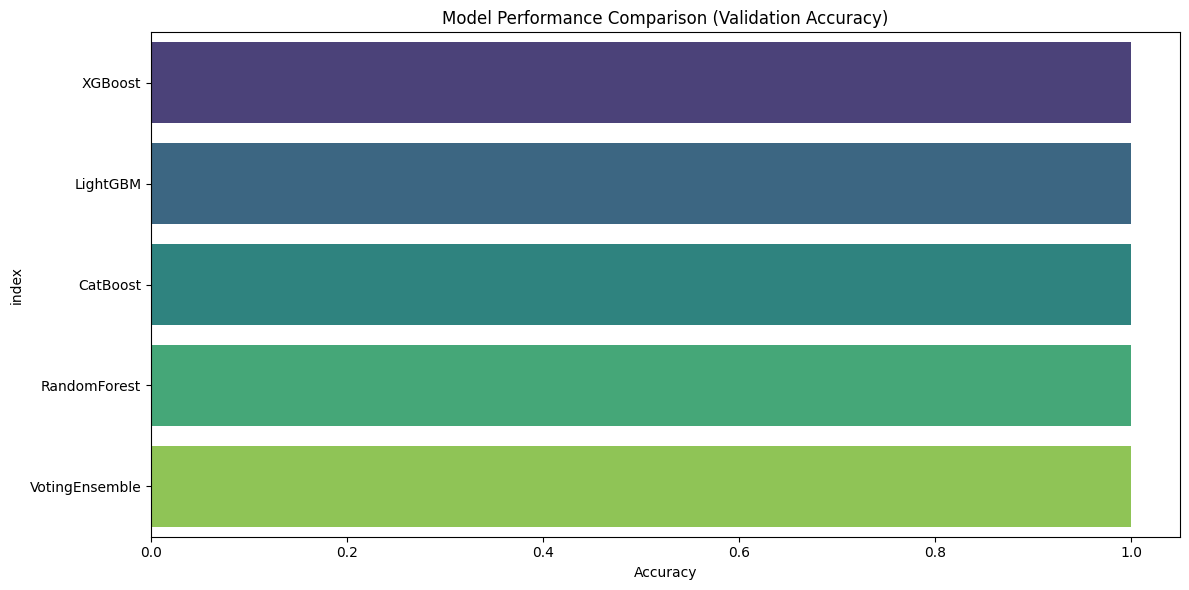


🏆 CHAMPION MODEL: XGBoost
🎯 CHAMPION ACCURACY: 1.0000

Detailed Validation Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00       

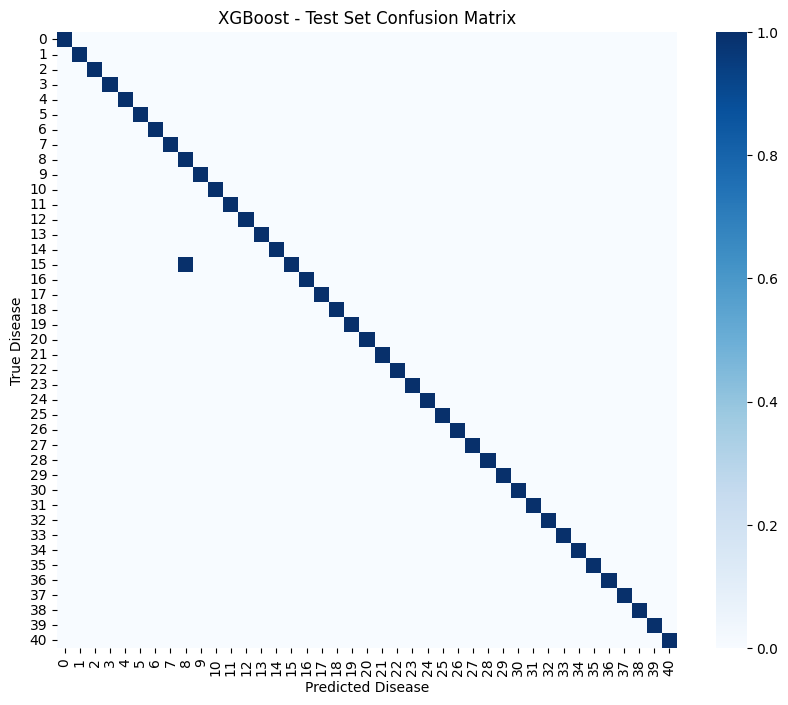

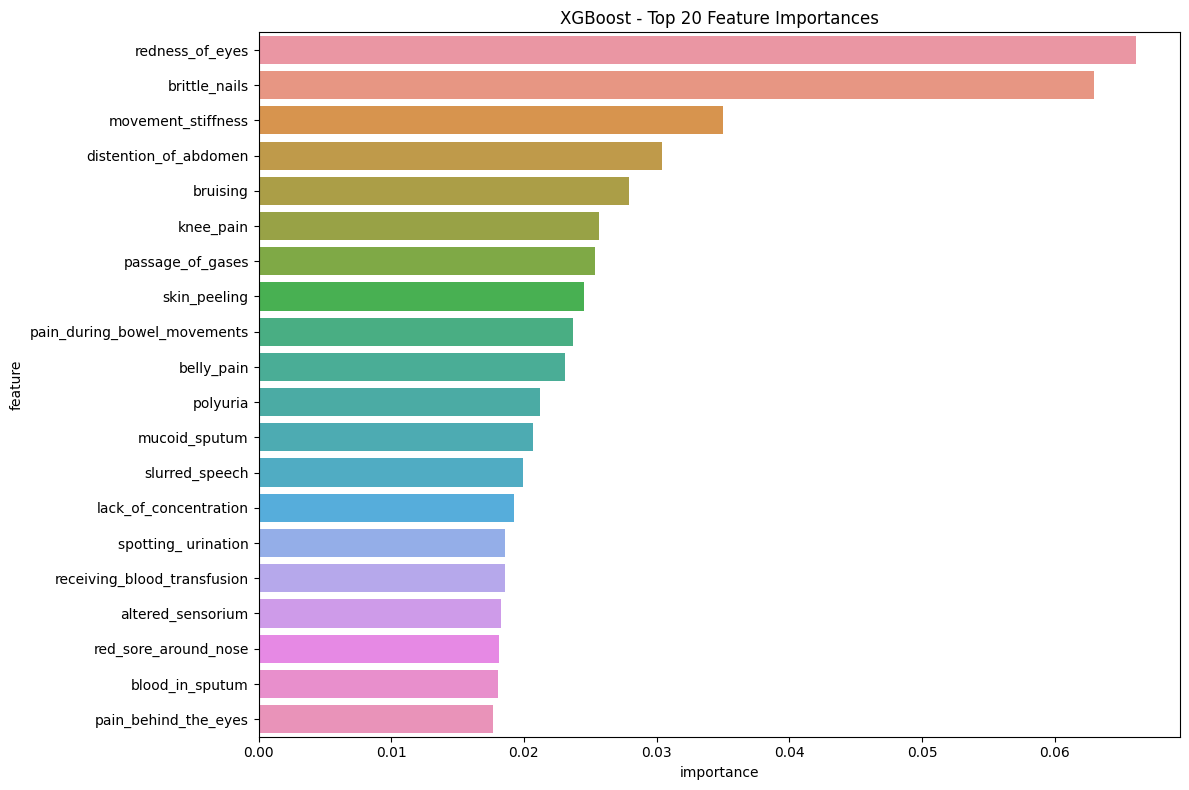

Top 10 Most Important Features:


,feature,importance
81,redness_of_eyes,0.066133
66,brittle_nails,0.062972
89,movement_stiffness,0.034965
65,distention_of_abdomen,0.030386
73,bruising,0.027900
63,knee_pain,0.025673
44,passage_of_gases,0.025373
71,skin_peeling,0.024527
38,pain_during_bowel_movements,0.023679
10,belly_pain,0.023126



💾 SAVING CHAMPIONSHIP RESULTS
✅ Saved champion_model.pkl
✅ Saved predictions.csv
✅ Saved championship_results.json

🎉 HACKATHON MODEL PIPELINE COMPLETE!
🏆 Champion: XGBoost (0.9762 accuracy)
🚀 Ready for Flask deployment!


In [1]:
# ======================================================================
# model_selection.ipynb  |  Disease-Prediction Mini-Hackathon
# FOCUSED: Compare models, select champion, generate predictions
# Author: <your name>  |  Python 3.10.11
# ======================================================================

# %% [markdown]
# # 1. Setup & Configuration

# %%
import os, warnings, logging, joblib, json
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

warnings.filterwarnings("ignore")
SEED = 42

ROOT = Path.cwd().parent if Path.cwd().name.lower()=="notebook" else Path.cwd()
PROC = ROOT / "data" / "processed" 
MODELS = ROOT / "models"

print("🏆 Model Selection & Final Evaluation")
print("=" * 50)

# %% [markdown]
# # 2. Load Trained Models & Data

# %%
# Load training results
with open(MODELS / "training_results.json", 'r') as f:
    training_results = json.load(f)

# Load models
trained_models = {}
model_files = {
    'XGBoost': 'model_xgboost.pkl',
    'LightGBM': 'model_lightgbm.pkl', 
    'CatBoost': 'model_catboost.pkl',
    'RandomForest': 'model_randomforest.pkl',
    'VotingEnsemble': 'model_votingensemble.pkl'
}

for name, filename in model_files.items():
    trained_models[name] = joblib.load(MODELS / filename)
    print(f"✅ Loaded {name}")

# Load validation data
X_valid = pd.read_csv(PROC / "X_valid_selected.csv")
y_valid = pd.read_csv(PROC / "y_valid.csv").squeeze()
print(f"Validation data: {X_valid.shape}")

# %% [markdown]
# # 3. Model Comparison

# %%
print("\n📊 MODEL PERFORMANCE COMPARISON")
print("=" * 50)

comparison_df = pd.DataFrame(training_results).T
comparison_df = comparison_df.sort_values('valid_accuracy', ascending=False)

print("Validation Accuracy Ranking:")
for i, (name, row) in enumerate(comparison_df.iterrows(), 1):
    print(f"{i}. {name:15}: {row['valid_accuracy']:.4f} (CV: {row['cv_mean']:.4f}±{row['cv_std']:.4f})")

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df.reset_index(), x='valid_accuracy', y='index', palette='viridis')
plt.title('Model Performance Comparison (Validation Accuracy)')
plt.xlabel('Accuracy')
plt.tight_layout()
plt.show()

# %% [markdown]
# # 4. Champion Model Selection

# %%
champion_name = comparison_df.index[0]  # Best validation accuracy
champion_model = trained_models[champion_name]
champion_accuracy = comparison_df.iloc[0]['valid_accuracy']

print(f"\n🏆 CHAMPION MODEL: {champion_name}")
print(f"🎯 CHAMPION ACCURACY: {champion_accuracy:.4f}")

# Detailed performance on validation set
y_valid_pred = champion_model.predict(X_valid)
print(f"\nDetailed Validation Results:")
print(classification_report(y_valid, y_valid_pred))

# %% [markdown]
# # 5. Test Set Evaluation

# %%
print("\n🎪 FINAL TEST EVALUATION")
print("=" * 50)

# Load test data  
test_df = pd.read_csv(PROC / "test_processed.csv")
selected_features = joblib.load(MODELS / "selected_features.pkl")

X_test = test_df.drop('prognosis', axis=1)[selected_features]
y_test_true = test_df['prognosis']

# Generate predictions
test_predictions = champion_model.predict(X_test)
test_accuracy = accuracy_score(y_test_true, test_predictions)

print(f"Champion Model: {champion_name}")
print(f"Validation Accuracy: {champion_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Detailed test results
print(f"\nTest Set Classification Report:")
print(classification_report(y_test_true, test_predictions))

# %% [markdown]
# # 6. Confusion Matrix Visualization

# %%
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_true, test_predictions)
sns.heatmap(cm, annot=False, cmap='Blues', fmt='d')
plt.title(f'{champion_name} - Test Set Confusion Matrix')
plt.ylabel('True Disease')
plt.xlabel('Predicted Disease')
plt.show()

# %% [markdown]
# # 7. Feature Importance Analysis

# %%
if hasattr(champion_model, 'feature_importances_'):
    importance = champion_model.feature_importances_
elif hasattr(champion_model, 'estimators_'):
    importance = np.mean([est.feature_importances_ for est in champion_model.estimators_], axis=0)
else:
    importance = None

if importance is not None:
    feature_importance_df = pd.DataFrame({
        'feature': selected_features,
        'importance': importance
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance_df.head(20), y='feature', x='importance')
    plt.title(f'{champion_name} - Top 20 Feature Importances')
    plt.tight_layout()
    plt.show()
    
    print("Top 10 Most Important Features:")
    display(feature_importance_df.head(10))

# %% [markdown]
# # 8. Save Final Results

# %%
print("\n💾 SAVING CHAMPIONSHIP RESULTS")
print("=" * 50)

# Save champion model
joblib.dump(champion_model, MODELS / "champion_model.pkl")
print(f"✅ Saved champion_model.pkl")

# Save predictions for submission  
submission_df = pd.DataFrame({'prediction': test_predictions})
submission_df.to_csv(ROOT / "predictions.csv", index=False)
print(f"✅ Saved predictions.csv")

# Save final summary
final_summary = {
    'champion_model': champion_name,
    'validation_accuracy': float(champion_accuracy),
    'test_accuracy': float(test_accuracy),
    'all_model_results': training_results,
    'features_used': len(selected_features),
    'test_samples': int(len(X_test))
}

with open(MODELS / "championship_results.json", 'w') as f:
    json.dump(final_summary, f, indent=2)
print(f"✅ Saved championship_results.json")

print(f"\n🎉 HACKATHON MODEL PIPELINE COMPLETE!")
print(f"🏆 Champion: {champion_name} ({test_accuracy:.4f} accuracy)")
print(f"🚀 Ready for Flask deployment!")
